In [1]:
#default_exp retrieval

# Data Retrieval

<br>

### Imports

In [19]:
#exports
import json
import numpy as np
import pandas as pd

import requests

In [20]:
import FEAutils as hlp
import matplotlib.pyplot as plt
from IPython.display import JSON

<br>

### User Inputs

In [21]:
raw_data_dir = '../data/raw'
intermediate_data_dir = '../data/intermediate'

In [22]:
get_holidays_json = lambda holidays_url='https://www.gov.uk/bank-holidays.json': requests.get(holidays_url).json()

holidays_json = get_holidays_json()

JSON(holidays_json)

<IPython.core.display.JSON object>

In [24]:
#exports
def save_latest_raw_holiday_data(raw_data_dir, holidays_url='https://www.gov.uk/bank-holidays.json'):
    holidays_json = get_holidays_json(holidays_url)
    
    with open(f'{raw_data_dir}/holidays.json', 'w') as fp:
        json.dump(holidays_json, fp)
        
    return 

In [26]:
save_latest_raw_holiday_data(intermediate_data_dir)

In [8]:
#exports
def load_holidays_df(raw_data_dir):
    with open(f'{raw_data_dir}/holidays.json', 'r') as fp:
        holidays_json = json.load(fp)

    df_holidays = pd.DataFrame(holidays_json['england-and-wales']['events'])
    df_holidays['date'] = pd.to_datetime(df_holidays['date'])
    
    return df_holidays

In [9]:
df_holidays = load_holidays_df(raw_data_dir)

df_holidays.head()

,title,date,notes,bunting
0,New Year’s Day,2016-01-01,,True
1,Good Friday,2016-03-25,,False
2,Easter Monday,2016-03-28,,True
3,Early May bank holiday,2016-05-02,,True
4,Spring bank holiday,2016-05-30,,True


In [10]:
#exports
def holidays_df_to_s(df_holidays):
    holidays_dt_range = pd.date_range(df_holidays['date'].min(), df_holidays['date'].max(), freq='30T', tz='UTC')

    s_holidays = pd.Series(np.isin(holidays_dt_range.date, df_holidays['date'].dt.date), index=holidays_dt_range).astype(int)
    s_holidays.index.name = 'datetime'
    s_holidays.name = 'holiday'
    
    return s_holidays

In [11]:
s_holidays = holidays_df_to_s(df_holidays)

s_holidays.head()

datetime
2016-01-01 00:00:00+00:00    1
2016-01-01 00:30:00+00:00    1
2016-01-01 01:00:00+00:00    1
2016-01-01 01:30:00+00:00    1
2016-01-01 02:00:00+00:00    1
Freq: 30T, Name: holiday, dtype: int32

(0.1, 0.9)

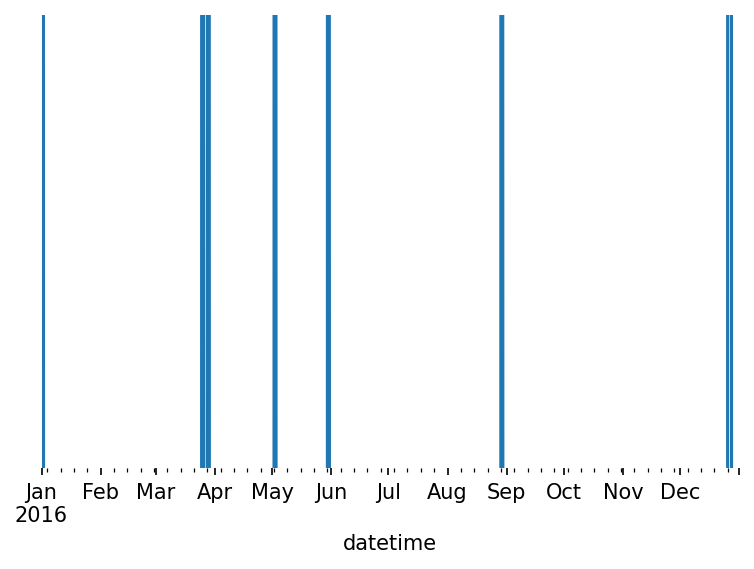

In [12]:
fig, ax = plt.subplots(dpi=150)

s_holidays['2016'].plot()

hlp.hide_spines(ax, positions=['top', 'bottom', 'left', 'right'])
ax.set_yticks([])
ax.set_ylim(0.1, 0.9)

In [13]:
#exports
def load_holidays_s(raw_data_dir):
    df_holidays = load_holidays_df(raw_data_dir)
    s_holidays = holidays_df_to_s(df_holidays)
    
    return s_holidays

In [14]:
s_holidays = load_holidays_s(raw_data_dir)

s_holidays.head()

datetime
2016-01-01 00:00:00+00:00    1
2016-01-01 00:30:00+00:00    1
2016-01-01 01:00:00+00:00    1
2016-01-01 01:30:00+00:00    1
2016-01-01 02:00:00+00:00    1
Freq: 30T, Name: holiday, dtype: int32

In [15]:
s_holidays.to_csv(f'{intermediate_data_dir}/holidays.csv')

<br>

Finally we'll export the relevant code to our `batopt` module

In [16]:
#hide
from nbdev.export import notebook2script
    
notebook2script()

Converted 00-utilities.ipynb.
Converted 01-retrieval.ipynb.
Converted 02-cleaning.ipynb.
Converted 03-charging.ipynb.
Converted 04-discharging.ipynb.
Converted 05-constraints.ipynb.
Converted 06-tuning.ipynb.
Converted 07-charging-nn.ipynb.
Converted 08-pipeline.ipynb.
